# DS-NYC-45 | Unit Project 1: Research Design Write-Up

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

>>**Answer: Return customer indicator (Yes or No). We will identify which (if any) customer characteristics (demographic & behavioral) correlate with conversion from free-tier to paying over time. **

> ### Question 2.  What are the predictors/covariates?

>>**Answer: The predictors/covariates are:**
- **age**
- **gender**
- **location**
- **profession**
- **days since last login**
- **activity score**

> ### Question 3.  What timeframe is this data relevent for?

>>**Answer: The data is relevant for January-April 2015.**

> ### Question 4.  What is the hypothesis?

>>**Answer: Demographic & historical behavioral data will allow us to predict which customers convert to paying.**

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

%matplotlib inline

df = pd.read_csv('/Users/stevereed/Desktop/GA Classes/GA_DAT_NOV-FEB 2016/DAT-NYC-45_12.8.16/unit-project/dataset/ucla-admissions.csv')

df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


> ### Question 5.  Create a data dictionary.

>>**Answer:**

| Variable | Description                                                                                                                         | Type of Variable |
|----------|-------------------------------------------------------------------------------------------------------------------------------------|------------------|
| admit    | is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) or not (admit = 0).                | categorical      |
| gre      | is the GRE score. GRE stands for Graduate Record Examination.                                                                       | continuous       |
| gpa      | is the GPA score. GPA stands for Grade Point Average.                                                                               | continuous       |
| prestige | is the prestige of an applicant alma mater, with 1 as highest tier (most prestigeous) and 4 as the lowest tier (least prestigeous). | categorical      |

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

>>**Answer: Return admission indicator (Yes or No). We will identify which (if any) student characteristics correlate with being admitted to UCLA.**

> ### Question 7.  What are the predictors/covariates?

>>**Answer: Predictors/covariates are:**
- **GRE**
- **GPA**
- **Prestige**

> ### Question 8.  What timeframe is this data relevent for?

>>**Answer: The data is relevant for the timeframe it represents. We do not know what that timeframe is and should avoid using the data to make predictions about other time periods.**

> ### Question 9.  What is the hypothesis?

>>**Answer: GPA, GRE & Prestige data will allow us to predict admission acceptance or rejection.**

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

>>**Answer: Using UCLA Graduate School admissions data from an unknown timeframe, determine which factors / how likely a student is to be admitted based on academic performance (GRE Score, GPA) and alma mater prestige level data.**

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

>>**Answer**:
- **familiarize yourself with the dataset using summaries, samples, etc.**
- **look for outliers, missing data, and data that will need to be cleaned up**
- **ultimately feel confident/familiar enough w/ the data and relevant variables to start using a model to predict outcomes**

> ### Question 12.  What are the assumptions of the distribution of data?

>>**Answer: Normal???**

> ### Question 13.  How will determine the distribution of your data?

>>**Answer: Use .describe() to get a sense of how each variable is distributed (mean, median, std, etc). We can also use .plot() to create histograms showing the shape of the data.**

>>**For example:**

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


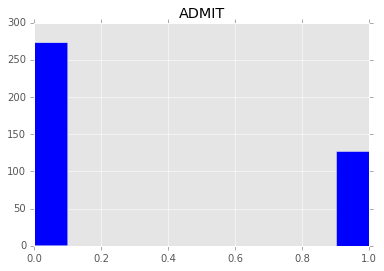

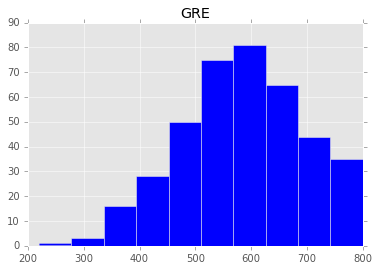

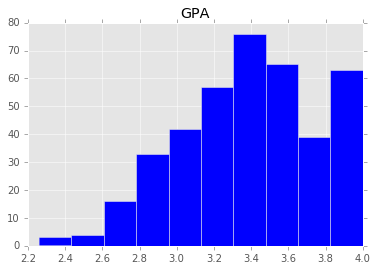

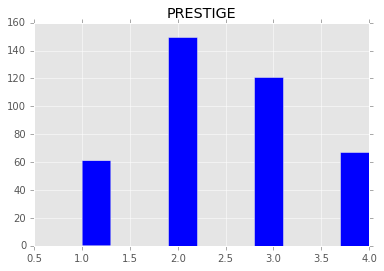

In [5]:
# get list of variable names from df
variable_list = df.columns.tolist()

# initiate empty dict that we'll fill up w/ each variable series
var_dict = {}

# add each variable to the empty dict (droping NaNs)
for var in variable_list:
    var_dict[var] = df[var][~np.isnan(df[var])]

# zip variable list to var_dict and have for loop print label before each hist plot
for var, label in zip(var_dict, variable_list):
    plt.hist(var_dict[var], color='b')
    plt.title(var.upper())
    plt.figure()
    plt.show();

> ### Question 14.  How might outliers impact your analysis?

>>**Answer: Outliers might be errors that should be ignored and they can inflate/deflate the mean & std info. GRE & GPA both have some low-end values with relatively low frequencies but nothing else stands out outliers to me based on the .describe() & .plot() results above.**

> ### Question 15.  How will you test for outliers?

>>**Answer: Inner / Outer Fence Method:**

>>*Code modified from [this source.](https://www.datacrucis.com/research/find-outliers-in-an-array.html)*

In [6]:
import numpy as np

"""check each value to see if it falls outside of the inner or outer fences:
    INNER defined as Q1 less 1.5*IQR & Q3 plus 1.5*IQR
    OUTER defined as Q1 less 3*IQR & Q3 plus 3*IQR"""

def outlier_check(value, p25, p75, fence):
    if fence.lower() == 'outer':
        lower = p25 - 3 * (p75 - p25)
        upper = p75 + 3 * (p75 - p25)
    else:
        lower = p25 - 1.5 * (p75 - p25)
        upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper

"""count how many values fall outside the fence indicated"""

def is_outlier(values, fence):
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
    
    is_outlier_list = []
    for index, value in enumerate(values):
        if outlier_check(value, p25, p75, fence):
            is_outlier_list.append(True)
        else:
            is_outlier_list.append(False)
    return sum(is_outlier_list)

"""run all variables through the outlier test functions (ignoring null values) and print results"""

def has_outliers(variables, fence):
    for var in variables:
        wo_nan = df[var][~np.isnan(df[var])]
        print var + ': ' + str(is_outlier(wo_nan, fence))

In [7]:
fences = ['inner', 'outer']

for fence in fences:
    print 'OUTSIDE ' + fence.upper() + ' FENCE:'
    has_outliers(variable_list, fence)
    print '\n'

OUTSIDE INNER FENCE:
admit: 0
gre: 4
gpa: 1
prestige: 0


OUTSIDE OUTER FENCE:
admit: 0
gre: 0
gpa: 0
prestige: 0




> ### Question 16.  What is colinearity?

>>**Answer: From [Wikipedia](https://en.wikipedia.org/wiki/Multicollinearity): 
In statistics, multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.**

> ### Question 17.  How will you test for covariance?

>>**Answer:**

In [8]:
df.cov().round(2)

,admit,gre,gpa,prestige
admit,0.22,9.87,0.03,-0.11
gre,9.87,13369.95,16.82,-13.65
gpa,0.03,16.82,0.14,-0.02
prestige,-0.11,-13.65,-0.02,0.89


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

>>**Answer:**